In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import json
import requests
import os
from pandas.io.json import json_normalize

%matplotlib inline

In [54]:
import descartes
import geopandas as gpd

In [55]:
cmap='YlGnBu'
cmap='Spectral'

,CVE_ENT,NOM_ENT,CAPITAL,AREA,PERIMETER,COV_,COV_ID,geometry
0,01,Aguascalientes,Aguascalientes,0.555867,423.00598,0,1,"POLYGON ((-101.86167 22.02888, -101.86185 22.0..."
1,02,Baja California,Mexicali,7.320657,3060.77271,1,2,"MULTIPOLYGON (((-114.12880 28.01224, -114.1283..."
2,03,Baja California Sur,La Paz,7.135057,5431.78664,2,3,"MULTIPOLYGON (((-109.91027 22.87937, -109.9102..."
3,04,Campeche,Campeche,5.526707,2999.98015,3,4,"MULTIPOLYGON (((-91.55142 18.28699, -91.55248 ..."
4,05,Coahuila de Zaragoza,Saltillo,15.065896,2407.15475,4,5,"POLYGON ((-99.84322 27.76986, -99.85626 27.755..."
5,06,Colima,Colima,0.573475,674.55721,5,6,"MULTIPOLYGON (((-103.73751 18.68440, -103.7377..."
6,07,Chiapas,Tuxtla GutiÃ©rrez,7.297092,2939.15562,6,7,"MULTIPOLYGON (((-92.77034 15.15128, -92.77107 ..."
7,08,Chihuahua,Chihuahua,24.695435,3125.62894,7,8,"POLYGON ((-103.30764 29.00323, -103.30770 29.0..."
8,09,Distrito Federal,Ciudad de MÃ©xico,0.148646,206.65989,8,9,"POLYGON ((-98.97900 19.07446, -98.98236 19.077..."
9,10,Durango,Victoria de Durango,12.213120,2500.70351,9,10,"POLYGON ((-103.69909 26.72526, -103.68202 26.7..."


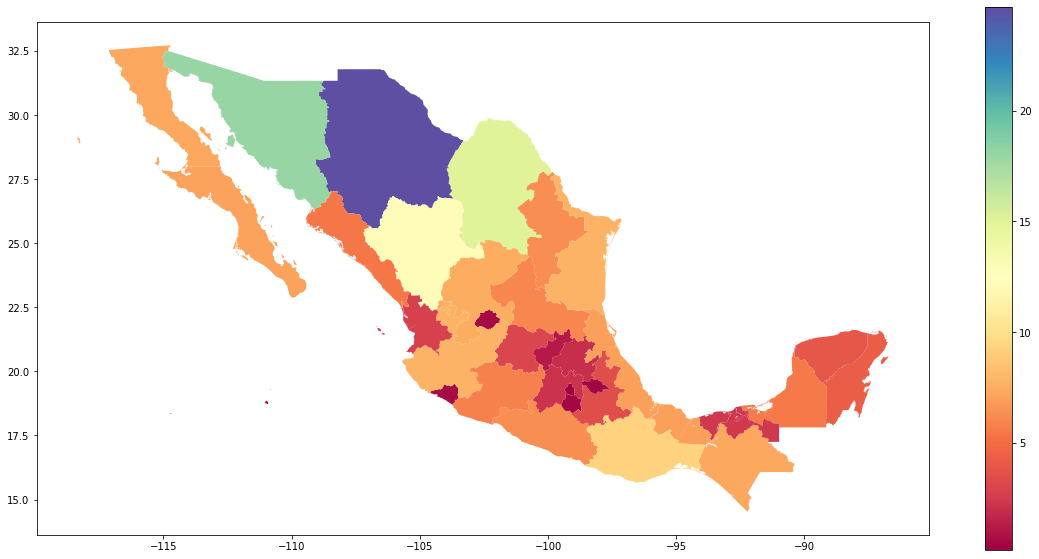

In [56]:
mex=gpd.read_file(r'/Users/fffte/ainda_drive/python/shapefiles/estados/dest_2015gw.shp')
mex['AREA']=mex['AREA']/1_000_000
mex.plot(column='AREA',figsize=(20,10),legend=True,cmap='Spectral')
display(mex)

In [57]:
estado=pd.DataFrame()
estado=mex['NOM_ENT']
display(estado)

0                      Aguascalientes
1                     Baja California
2                 Baja California Sur
3                            Campeche
4                Coahuila de Zaragoza
5                              Colima
6                             Chiapas
7                           Chihuahua
8                    Distrito Federal
9                             Durango
10                         Guanajuato
11                           Guerrero
12                            Hidalgo
13                            Jalisco
14                            MÃ©xico
15               MichoacÃ¡n de Ocampo
16                            Morelos
17                            Nayarit
18                        Nuevo LeÃ³n
19                             Oaxaca
20                             Puebla
21                         QuerÃ©taro
22                       Quintana Roo
23                   San Luis PotosÃ­
24                            Sinaloa
25                             Sonora
26          

In [58]:
estado[4,8,14,15,18,21,23,29,30]=['Coahuila','Ciudad de Mexico',
                               'Estado de Mexico',
                           'Michoacan',
                           'Nuevo Leon',
                           'Queretaro',
                           'San Luis Potosi',
                           'Veracruz',
                           'Yucatan']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [59]:
display(estado)

0          Aguascalientes
1         Baja California
2     Baja California Sur
3                Campeche
4                Coahuila
5                  Colima
6                 Chiapas
7               Chihuahua
8        Ciudad de Mexico
9                 Durango
10             Guanajuato
11               Guerrero
12                Hidalgo
13                Jalisco
14       Estado de Mexico
15              Michoacan
16                Morelos
17                Nayarit
18             Nuevo Leon
19                 Oaxaca
20                 Puebla
21              Queretaro
22           Quintana Roo
23        San Luis Potosi
24                Sinaloa
25                 Sonora
26                Tabasco
27             Tamaulipas
28               Tlaxcala
29               Veracruz
30                Yucatan
31              Zacatecas
Name: NOM_ENT, dtype: object

In [60]:
mexico_actua=pd.read_excel(r'/Users/fffte/ainda_drive/python/mexico_actua.xlsx',
                          index_col='estado')
result=mex.set_index('NOM_ENT').join(mexico_actua)
display(result)

,CVE_ENT,CAPITAL,AREA,PERIMETER,COV_,COV_ID,geometry,estres_hidrico,valor_produccion_millones,tecnificacion_%,hectareas_cosechadas
Aguascalientes,01,Aguascalientes,0.555867,423.00598,0,1,"POLYGON ((-101.86167 22.02888, -101.86185 22.0...",4.81,3395325.33,35.705002,145128.74
Baja California,02,Mexicali,7.320657,3060.77271,1,2,"MULTIPOLYGON (((-114.12880 28.01224, -114.1283...",3.28,19010350.44,94.998782,161630.03
Baja California Sur,03,La Paz,7.135057,5431.78664,2,3,"MULTIPOLYGON (((-109.91027 22.87937, -109.9102...",5.00,5301865.16,100.000000,35288.47
Campeche,04,Campeche,5.526707,2999.98015,3,4,"MULTIPOLYGON (((-91.55142 18.28699, -91.55248 ...",1.47,5213737.93,13.113561,326717.80
Chiapas,07,Tuxtla GutiÃ©rrez,7.297092,2939.15562,6,7,"MULTIPOLYGON (((-92.77034 15.15128, -92.77107 ...",0.84,18201031.06,4.257984,1283129.94
Chihuahua,08,Chihuahua,24.695435,3125.62894,7,8,"POLYGON ((-103.30764 29.00323, -103.30770 29.0...",4.63,47187481.70,57.412119,1004806.81
Ciudad de Mexico,09,Ciudad de MÃ©xico,0.148646,206.65989,8,9,"POLYGON ((-98.97900 19.07446, -98.98236 19.077...",4.90,1424201.68,9.354442,16287.07
Coahuila,05,Saltillo,15.065896,2407.15475,4,5,"POLYGON ((-99.84322 27.76986, -99.85626 27.755...",3.15,7863951.32,58.471382,260249.80
Colima,06,Colima,0.573475,674.55721,5,6,"MULTIPOLYGON (((-103.73751 18.68440, -103.7377...",3.74,7677263.59,44.969900,157599.53
Durango,10,Victoria de Durango,12.213120,2500.70351,9,10,"POLYGON ((-103.69909 26.72526, -103.68202 26.7...",3.02,9793165.90,27.672599,630657.80


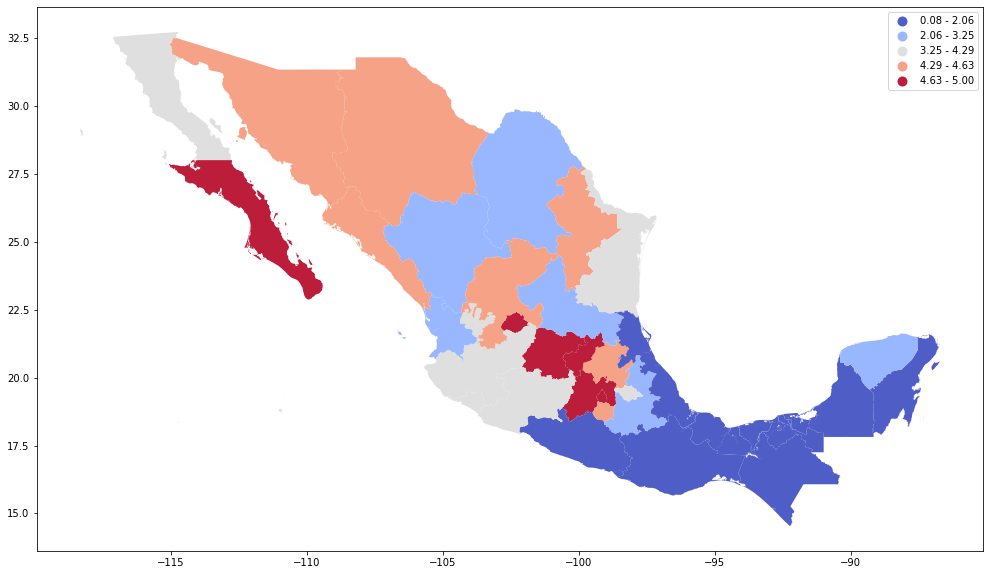

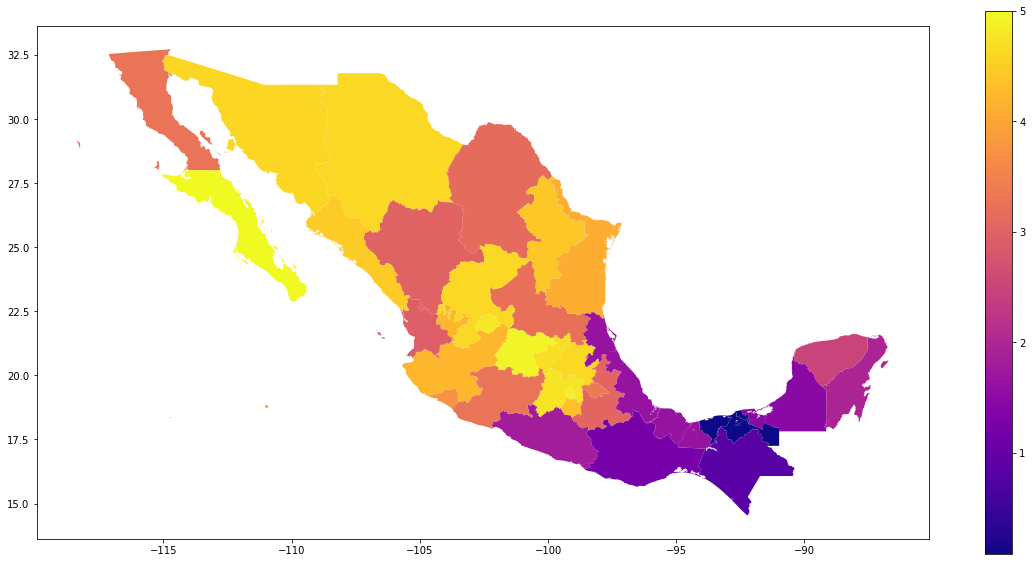

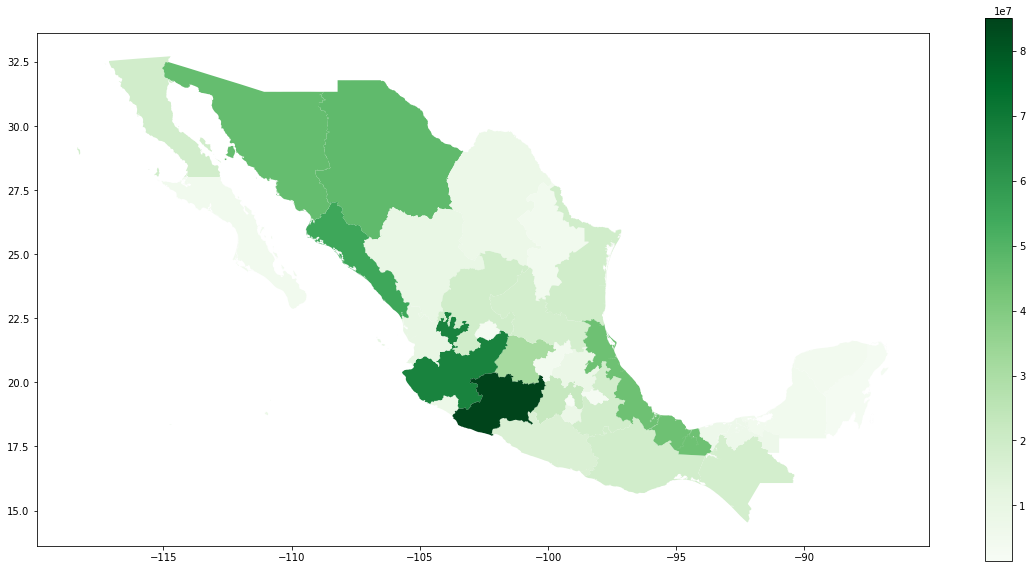

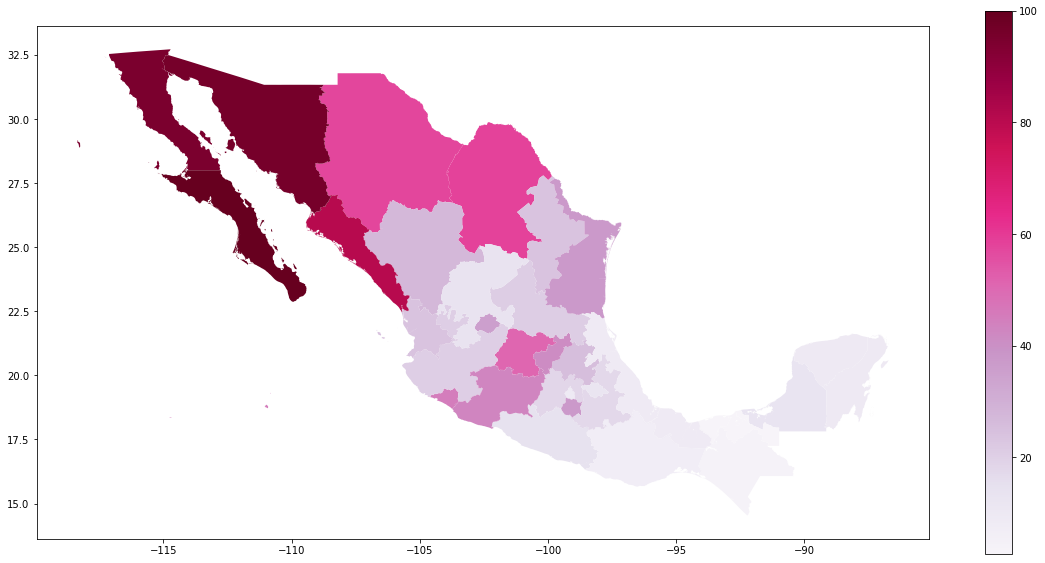

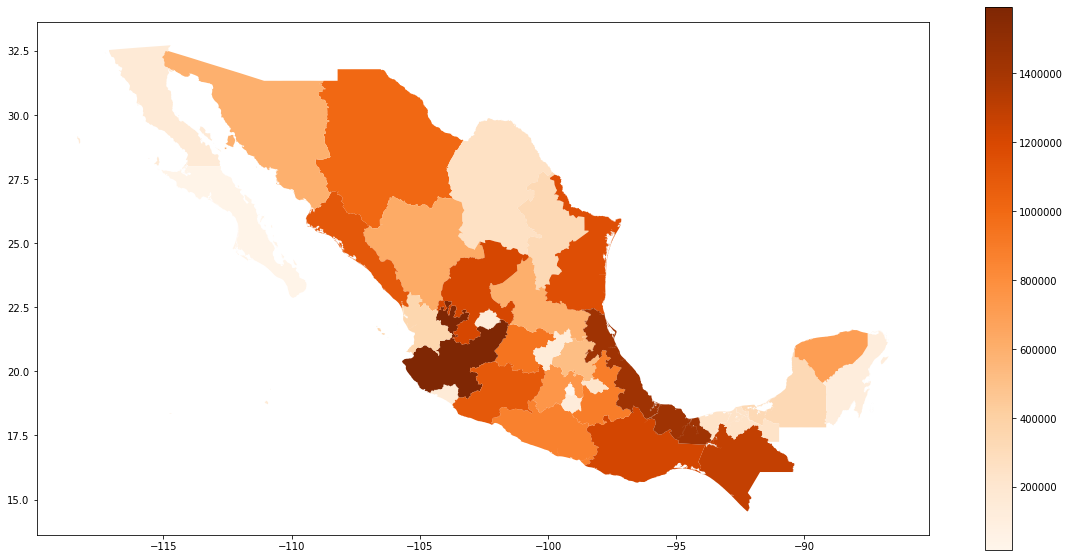

In [80]:
fig, ax = plt.subplots(1,figsize=(20,10))

result.plot(column='estres_hidrico',
            cmap='coolwarm', ax=ax, 
            legend=True, scheme='quantiles',alpha=0.9)


result.plot(column='estres_hidrico',figsize=(20,10),legend=True,cmap='plasma')
result.plot(column='valor_produccion_millones',figsize=(20,10),legend=True,cmap='Greens')
result.plot(column='tecnificacion_%',figsize=(20,10),legend=True,cmap='PuRd')
result.plot(column='hectareas_cosechadas',figsize=(20,10),legend=True,cmap='Oranges')